In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Akash's plotting preferences
plt.rcParams['axes.facecolor'] = 'whitesmoke'
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.rcParams["font.family"] = "monospace"
mpl.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

In [ ]:
np.random.seed(123)

## Questions

![./graphics/some_off_square.png]

## Solution 1
 

In [ ]:
runs = [int(1 * 2 ** i) for i in range(1, 24)]
total_runs = int(1e5)
count = 0
value = []

for i in tqdm(range(total_runs)):
    x1, y1 = np.random.uniform(0, 1), np.random.uniform(0, 1)
    x2, y2 = np.random.uniform(0, 1), np.random.uniform(0, 1)
    
    x_c, y_c = 0.5 * (x1 + x2), 0.5 * (y1 + y2)
    
    radius = np.sqrt((x1 - x_c) ** 2 + (y1 - y_c) ** 2)
    slope = -1 * (x2 - x1) / (y2 - y1)
    
    #x_unknown_1 = np.sqrt(radius ** 2 - (y_unknown - y_c) ** 2) + x_c
    #y_unknown = y_c - slope * (x_c - x_unknown)
    
    x_unknown_1 = x_c + np.sqrt(radius ** 2 / (slope ** 2 + 1))
    x_unknown_2 = x_c - np.sqrt(radius ** 2 / (slope ** 2 + 1))
    
    y_unknown_1 = y_c - slope * (x_c - x_unknown_1)
    y_unknown_2 = y_c - slope * (x_c - x_unknown_2)
    
    conditions = (
            (0 < x_unknown_1 < 1 and 0 < y_unknown_1 < 1) and
            (0 < x_unknown_2 < 1 and 0 < y_unknown_2 < 1)
    )
    
    if not conditions:
        #print(x_unknown_1, y_unknown_1, x_unknown_2, y_unknown_2)
        count += 1
    value.append(count / total_runs)

print(count / total_runs)

In [4]:
runs = [int(1 * 2 ** i) for i in range(6, 28)]
value = []

for total_runs in tqdm(runs):
    x1, y1 = np.random.uniform(0, 1, total_runs), np.random.uniform(0, 1, total_runs)
    x2, y2 = np.random.uniform(0, 1, total_runs), np.random.uniform(0, 1, total_runs)
    
    x_c, y_c = 0.5 * (x1 + x2), 0.5 * (y1 + y2)
    
    radius = np.sqrt((x1 - x_c) ** 2 + (y1 - y_c) ** 2)
    slope = -1 * (x2 - x1) / (y2 - y1)
    
    x_unknown_1 = x_c + np.sqrt(radius ** 2 / (slope ** 2 + 1))
    x_unknown_2 = x_c - np.sqrt(radius ** 2 / (slope ** 2 + 1))
    
    y_unknown_1 = y_c - slope * (x_c - x_unknown_1)
    y_unknown_2 = y_c - slope * (x_c - x_unknown_2)
    
    condition_1 = (np.logical_and(0 < x_unknown_1, x_unknown_1 < 1) 
                   & np.logical_and(0 < y_unknown_1, y_unknown_1 < 1))
    condition_2 = (np.logical_and(0 < x_unknown_2, x_unknown_2 < 1) 
                   & np.logical_and(0 < y_unknown_2, y_unknown_2 < 1))

    combined_conditions = condition_1 & condition_2
    
    count_false = np.sum(~combined_conditions) 
    
    value.append(count_false / total_runs)

100%|██████████| 22/22 [00:12<00:00,  1.70it/s] 


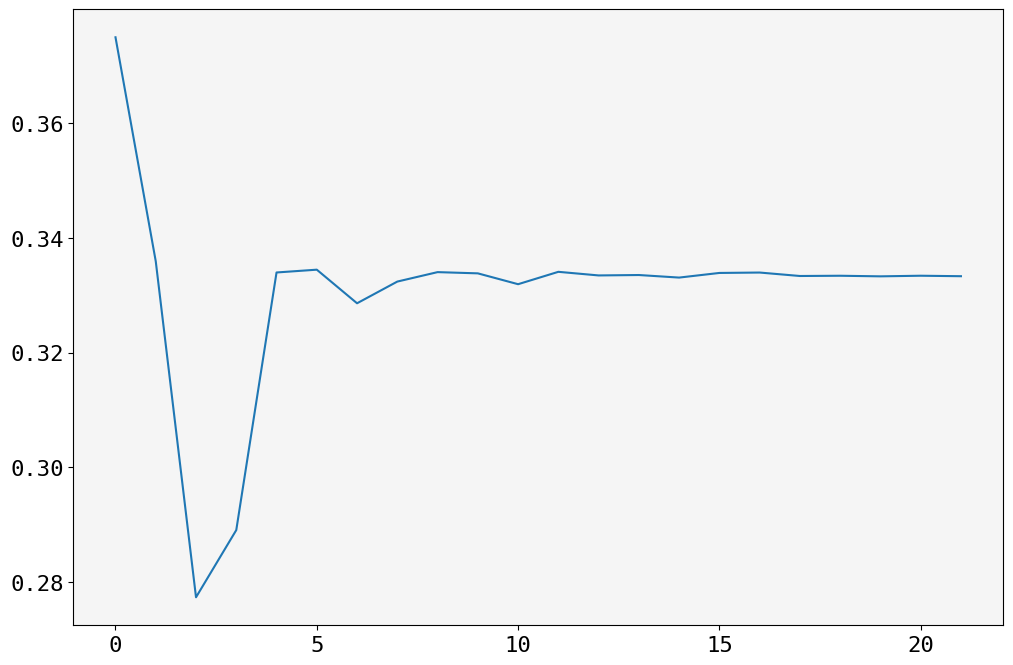

In [5]:
plt.plot(range(len(runs)), value)

In [ ]:
runs = [int(1 * 2 ** i) for i in range(6, 28)]
value = []

for total_runs in tqdm(runs):
    x1, y1 = np.random.uniform(0, 1, total_runs), np.random.uniform(0, 1, total_runs)
    x2, y2 = np.random.uniform(0, 1, total_runs), np.random.uniform(0, 1, total_runs)
    
    x_c, y_c = 0.5 * (x1 + x2), 0.5 * (y1 + y2)
    radius = np.sqrt((x1 - x_c) ** 2 + (y1 - y_c) ** 2)
    
    # Check if the circle is within the bounds of the square
    condition = (x_c - radius >= 0) & (x_c + radius <= 1) & \
                (y_c - radius >= 0) & (y_c + radius <= 1)
    
    count_false = np.sum(~condition) 
    value.append(count_false / total_runs)


In [6]:
plt.plot(range(len(runs)), value)

100%|██████████| 22/22 [00:09<00:00,  2.33it/s] 


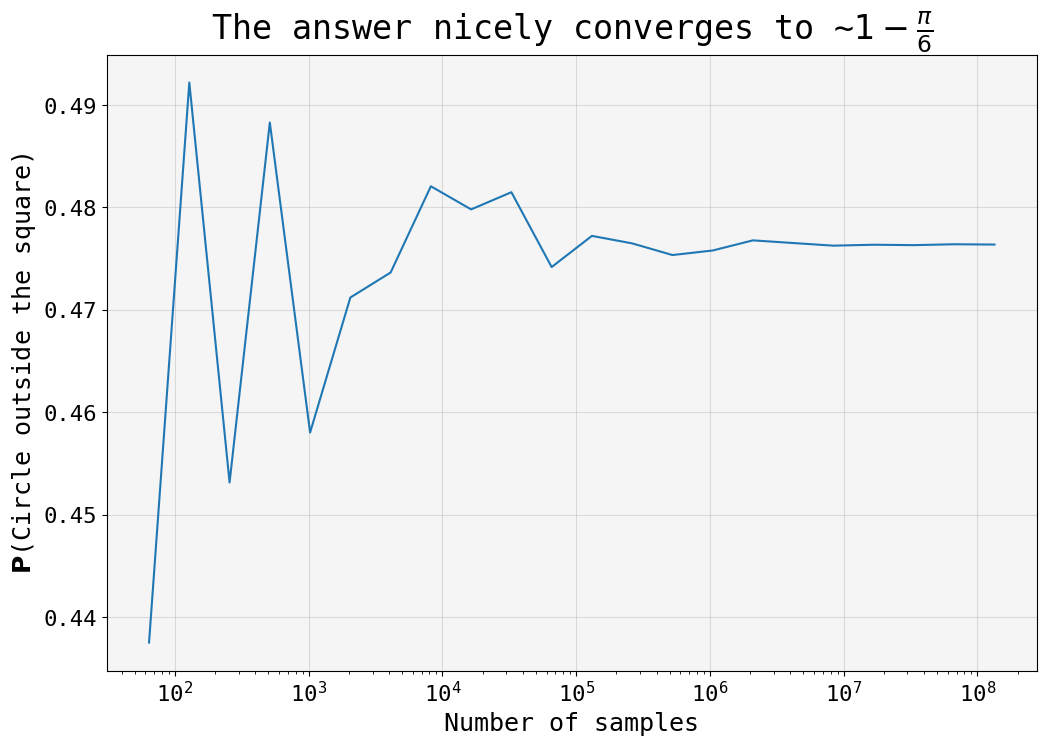

In [7]:
np.isclose(value[-1], 1- np.pi / 6, rtol=1e-2)

In [8]:
1 - np.pi / 6

True